**This** project aims to give sound and profitable recommendations to Microsoft which looks to get in on the fun of making movies. The movie industry is a mulit-billion industry that generates ridiculous profits to the movie studios. A careful and meticulous analysis must therefore be carried out to give recommendations to Microsoft Movie Studio on the following:
*  The genre of movie to produce. The genre to be produced is possibly affected by the viewership of the said genre.
*  The runtime minutes of the movie. This affects the production budget, the revenue as well as the viewership.
*  The budget of the movie. I will look at hte average budget of the well doing genre.
*  The expected revenue from the investment. I will have to calculate the return on investment of one movie.
*  I will also check the correlation between various factors that may have an effect on the project such as do high revenue genres have a wider audience appeal?

I will analyze data from the imdb.title.basics, imdb.title.ratings, and tn.movie_budgets.csv to achieve the recommendations.

**IMPORTING THE NECESSARY LIBRARIES AND DATASETS**

In [1]:
# Importing the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# loading the datasets
movie_budgets_df = pd.read_csv(r'tn.movie_budgets.csv')
title_basics_df = pd.read_csv(r'title.basics.csv')
title_ratings_df = pd.read_csv(r'title.ratings.csv')

**EXPLORING AND CLEANING THE DATA**

Before diving deep into the analysis of the data sets, I have to explore and clean the data to ensure that I get insights that are accurate.

***Exploring the movies_budgets_df data set***
* This data set gives the information about the budget and revenues of various movies.

In [3]:
# Checking the first five rows of the data
# This helps me understand how the data looks like

movie_budgets_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


*  The production budget is the amount of money invested in producing the movie.
*  The domestic gross is the revenue return of the movie locally while the worldwide gross referes to the revenue of the movie globally

In [4]:
# Checking the column names of the data set

movie_budgets_df.columns

Index(['id', 'release_date', 'movie', 'production_budget', 'domestic_gross',
       'worldwide_gross'],
      dtype='object')

In [5]:
# Looking at the shape of the dataset

movie_budgets_df.shape

(5782, 6)

The data set contains 5782 rows and 6 columns

In [6]:
# Running the .info() method to see the general information about the data set

movie_budgets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


The general information about the data set tells me the following:
*  The data set appears to have no null values which will be confirmed by running the .isna() function
*  The 'production_budget', 'domestic_gross', and 'worldwide_gross' columns have values in the object data type. Since this is about money I will want to change the data types to float64 to enable further analysis.
*  The total columns in the data set are 6.

In [7]:
# Looking for null values in the data set

movie_budgets_df.isna().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

The dataset contains no null values and can be used for further analysis.

In [8]:
# Stripping special characters as well as commas from the 'production_budget', 'domestic_gross', and 'worldwide_gross' columns
# Since it is not possible to apply the 'str.replace()' method on a DataFrame directly, I will write a 
# for loop that will apply the method to the specific columns in the dataframe. 

columns_to_strip = ['production_budget', 'domestic_gross', 'worldwide_gross']

for column in columns_to_strip:
    movie_budgets_df[column] = movie_budgets_df[column].str.replace('[^\w\s]', '')
    movie_budgets_df[column] = movie_budgets_df[column].str.replace(',', '')

In [9]:
# Confirming the special characters have been removied by checking the first 10 rows of the data set

movie_budgets_df.head(10)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200
7,8,"May 24, 2007",Pirates of the Caribbean: At Worldâs End,300000000,309420425,963420425
8,9,"Nov 17, 2017",Justice League,300000000,229024295,655945209
9,10,"Nov 6, 2015",Spectre,300000000,200074175,879620923


I can now change the data types of the columns

In [10]:
# Changing the data types of the columns

movie_budgets_df = movie_budgets_df.astype({'production_budget': 'float64', 'domestic_gross': 'float64', 'worldwide_gross': 'float64'})

In [11]:
# Confirming the data types fr the columns have been changed by running the .info()

movie_budgets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5782 non-null   int64  
 1   release_date       5782 non-null   object 
 2   movie              5782 non-null   object 
 3   production_budget  5782 non-null   float64
 4   domestic_gross     5782 non-null   float64
 5   worldwide_gross    5782 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 271.2+ KB


To better understand the DataFrame I will run the .describe() method and interpret it.

In [12]:
movie_budgets_df.describe()

,id,production_budget,domestic_gross,worldwide_gross
count,5782.000000,5.782000e+03,5.782000e+03,5.782000e+03
mean,50.372363,3.158776e+07,4.187333e+07,9.148746e+07
std,28.821076,4.181208e+07,6.824060e+07,1.747200e+08
min,1.000000,1.100000e+03,0.000000e+00,0.000000e+00
25%,25.000000,5.000000e+06,1.429534e+06,4.125415e+06
50%,50.000000,1.700000e+07,1.722594e+07,2.798445e+07
75%,75.000000,4.000000e+07,5.234866e+07,9.764584e+07
max,100.000000,4.250000e+08,9.366622e+08,2.776345e+09


The following can be interpreted from the data:
*  There are 5782 movies int he dataset for each column meaning there are no missing values in any of the columns.
*  The average production budget of the movie is approximately 31,587,760 the domestic gross is approximately 41,873,330 and the average worldwide gross is 91,487,460.
*  The std of the production budget is 41,812,080 the domestic gross is 68,240,600 and the worldwide gross is 174,720,000. This indicates that the revenues vary considerably form the mean.
*  The min shows the minuimum value in each column and the max value shows the maximum values in each column.
*  The 25% which is the first quartile shows the values below which 25% of the data falls.
*  The 50% which is also the median is the value that separates the lower 50% to the upper 50%.
*  The 75% which is the third quartile is the value below which 75% of the data falls. 

***Exploring and cleaning title_basics_df***
*  This data set gives information about the runtime minutes and the genres of different movies

In [13]:
title_basics_df.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


*  I can observe that there are different genres and one movie could be classified into more than one genres.
*  There are two title columnc for the movie. To simplify the data analysis, I will make use of the primary title column.
*  The start year represents the year that the movie was released for the public to watch and stream.
*  tconst is the unique id for a movie.

In [14]:
title_basics_df.shape

(146144, 6)

In [15]:
title_basics_df.columns

Index(['tconst', 'primary_title', 'original_title', 'start_year',
       'runtime_minutes', 'genres'],
      dtype='object')

In [16]:
title_basics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [17]:
# Looking for columns having null values

title_basics_df.isna().sum()

tconst                 0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

I will replace the null values in 'original_title' and 'genres' with "Unkown"
and impute the null values in 'runtime_minutes'

In [18]:
title_basics_df['original_title'].fillna("Unknown", inplace=True)
title_basics_df['genres'].fillna("Unknown", inplace=True)

Looking at the distribution of data in 'runtime_minutes' column to choose whether to impute by mean or median

In [19]:
title_basics_df['runtime_minutes'].describe()

count    114405.000000
mean         86.187247
std         166.360590
min           1.000000
25%          70.000000
50%          87.000000
75%          99.000000
max       51420.000000
Name: runtime_minutes, dtype: float64

Since the **median** is less susceptible to the distribution of the data I will impute by the median. The mean is heavily affected by outliers in the data set.

In [20]:
title_basics_df['runtime_minutes'].fillna(title_basics_df['runtime_minutes'].median(), inplace=True)

In [21]:
title_basics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146144 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  146144 non-null  float64
 5   genres           146144 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


The data contains no null values and can be used for further analysis.

***Exploring and cleaning title_ratings_df***
*  The data contains the average rating of the movies which tells how popular and good the film was.
*  I can know which movie is rated by using the tconst to refer to the 'title_basics_name.df' and get the movie name that matches the tconst.
*  The numvotes shows the number of viewers that rated the film

In [22]:
title_ratings_df.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [23]:
title_ratings_df.shape

(73856, 3)

In [24]:
title_ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [25]:
title_ratings_df.isna().sum()

tconst           0
averagerating    0
numvotes         0
dtype: int64

All the data sets are clean and I can move on to data visualizations

**EXPLORATORY DATA ANALYSIS**

To be able to analyze the data various aspects of it, I will need to merge the data sets. I will merge the 'movie_budgets_df' with the 'title_basics_df'.

In [26]:
# Merging movie_budgets_df with title_basics_df based on 'movie' and 'primary_title' columns

merged_df = pd.merge(movie_budgets_df, title_basics_df, left_on='movie', right_on='primary_title', how='inner')

merged_df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,tt1775309,Avatar,Abatâ,2011,93.0,Horror
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011,136.0,"Action,Adventure,Fantasy"
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,tt6565702,Dark Phoenix,Dark Phoenix,2019,113.0,"Action,Adventure,Sci-Fi"
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,141.0,"Action,Adventure,Sci-Fi"
4,7,"Apr 27, 2018",Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018,149.0,"Action,Adventure,Sci-Fi"
...,...,...,...,...,...,...,...,...,...,...,...,...
3810,68,"Jul 6, 2001",Cure,10000.0,94596.0,9.459600e+04,tt5936960,Cure,Cure,2014,87.0,Unknown
3811,70,"Apr 1, 1996",Bang,10000.0,527.0,5.270000e+02,tt6616538,Bang,Bang,2015,87.0,Unknown
3812,73,"Jan 13, 2012",Newlyweds,9000.0,4584.0,4.584000e+03,tt1880418,Newlyweds,Newlyweds,2011,95.0,"Comedy,Drama"
3813,78,"Dec 31, 2018",Red 11,7000.0,0.0,0.000000e+00,tt7837402,Red 11,Red 11,2019,77.0,"Horror,Sci-Fi,Thriller"


**Genre Analysis**
*  I want to understand which movie genres are dominant in the dataset which will help me identify the popular genre to help me guide Micorosoft in the genre to produce.
*  I will plot a bar graph on the number of movies against the genres of the movies.

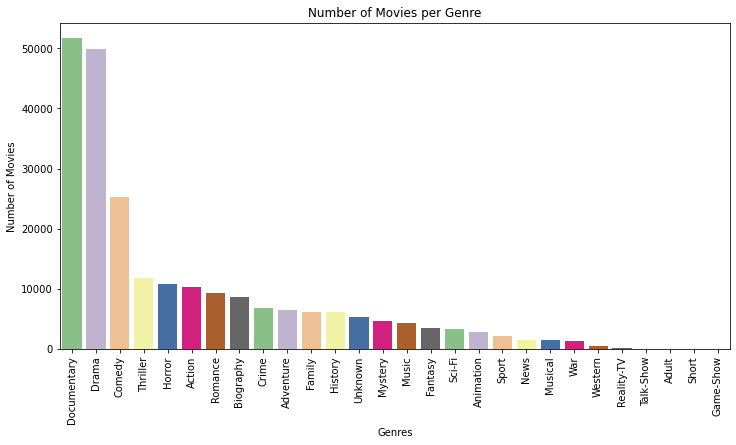

In [27]:
# Counting the number of movies in each genre
# I had to first split the genres column, which contains multiple genres for each movie, into separate rows to count the
# the occurrences of each genre

genre_counts = title_basics_df['genres'].str.split(',', expand=True).stack().value_counts()

# Plotting the bar chart

plt.figure(figsize=(12, 6))
sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='Accent')
plt.xticks(rotation=90)
plt.xlabel('Genres')
plt.ylabel('Number of Movies')
plt.title('Number of Movies per Genre')
plt.show()



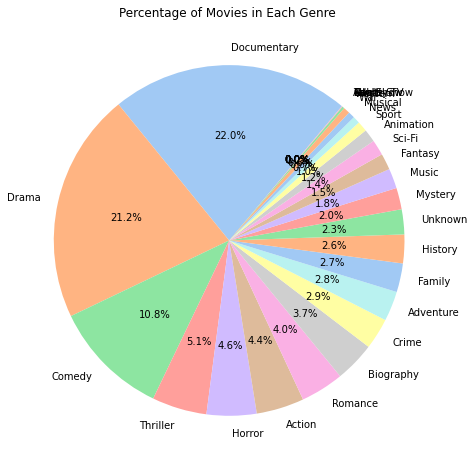

In [28]:
# Plotting the pie chart to show the percentage of movies in each genre
plt.figure(figsize=(7, 8))
plt.pie(genre_counts, labels=genre_counts.index, autopct='%1.1f%%', startangle=50, colors=sns.color_palette('pastel'))
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title('Percentage of Movies in Each Genre')
plt.show()

*  From the bar graph it is clear that the most popular genres are Documentary followed by Drama with about 50000 movies each.
*  22% of the movies are documentaries which shows how popular documentaries are with the public. Drama films are also just as popular with 21.2% of the movies.

**Runtime Analysis**
*  I want to understand the typical runtime preferred by viewers by exploring the distribution of movie runtimes.
*  I will plot a bar graph showing the number of movies against the runtime minutes of the movies.

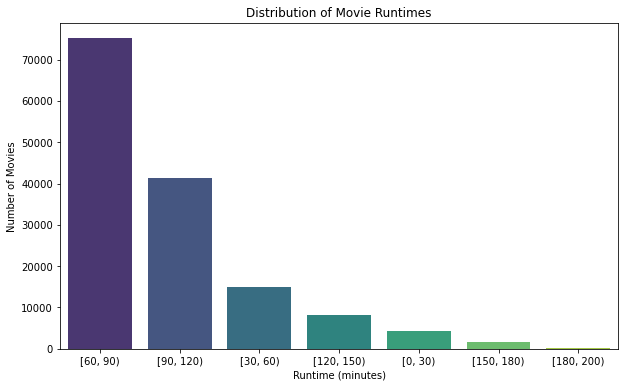

In [29]:
# Defining the bin edges for different runtime intervals

bin_edges = [0, 30, 60, 90, 120, 150, 180, 200]

# Grouping the runtimes into bins and counting the number of movies in each bin

bin_counts = pd.cut(title_basics_df['runtime_minutes'], bins=bin_edges, right=False).value_counts()

# Plotting the bar chart

plt.figure(figsize=(10, 6))
sns.barplot(x=bin_counts.index.astype(str), y=bin_counts.values, palette='viridis')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Number of Movies')
plt.title('Distribution of Movie Runtimes')
plt.show()


*  The bar graph calculates the number of movies in different runtime intervals.
*  From the bar graph it is visible that a majority of the movies that were most produced were from 60 - 90 minutes long.


Now that I established that a majority of dominant films are doumnetaries and drama, I will look to check what percentage of films with a runtime of 60 to 90 minutes are documentaries and drama films.

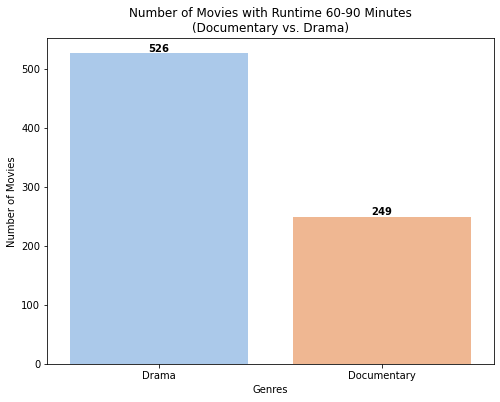

In [30]:
# Filtering the merged DataFrame to include only movies with a runtime of 60 to 90 minutes

filtered_movies = merged_df[(merged_df['runtime_minutes'] >= 60) & (merged_df['runtime_minutes'] <= 90)]


# Grouping the filtered DataFrame by genre and counting the number of movies in each genre

genre_counts = filtered_movies['genres'].str.split(',', expand=True).stack().value_counts()


# Filtering the genre counts to include only Documentary and Drama genres

genre_counts = genre_counts[genre_counts.index.isin(['Documentary', 'Drama'])]


# Creating the bar plot

plt.figure(figsize=(8, 6))
sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='pastel')
plt.xlabel('Genres')
plt.ylabel('Number of Movies')
plt.title('Number of Movies with Runtime 60-90 Minutes\n(Documentary vs. Drama)')


# Annotating each bar with the count of movies

for index, value in enumerate(genre_counts.values):
    plt.text(index, value, str(value), ha='center', va='bottom', fontweight='bold')
plt.show()


I can observe that of the total number of movies with a runtime of 60 to 90 minutes, 526 of them are dram films and 249 of them are documentary films.

I will look to check of the total number of documentary films, what is the percentage of them with a runtime of 60 to 90 minutes. I will do the same for drama films

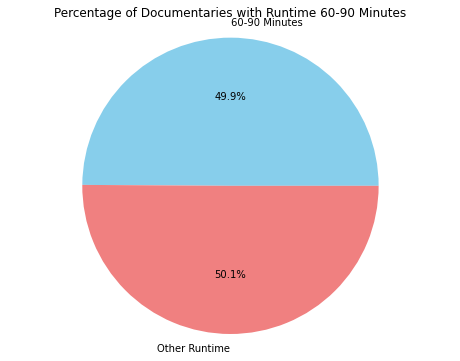

In [31]:
# Filtering the merged DataFrame to include only documentaries

documentaries_df = merged_df[merged_df['genres'].str.contains('Documentary')]


# Filtering the documentaries to include only those with a runtime of 60 to 90 minutes

documentaries_runtime_df = documentaries_df[(documentaries_df['runtime_minutes'] >= 60) & (documentaries_df['runtime_minutes'] <= 90)]


# Calculating the count of documentaries with a runtime of 60 to 90 minutes

num_documentaries_with_runtime = len(documentaries_runtime_df)


# Calculating the total number of documentaries

total_documentaries = len(documentaries_df)


# Calculating the percentage of documentaries with a runtime of 60 to 90 minutes

percentage_documentaries_with_runtime = (num_documentaries_with_runtime / total_documentaries) * 100


# Creating the pie chart

plt.figure(figsize=(8, 6))
plt.pie([percentage_documentaries_with_runtime, 100 - percentage_documentaries_with_runtime],
        labels=['60-90 Minutes', 'Other Runtime'],
        autopct='%1.1f%%',
        colors=['skyblue', 'lightcoral'])
plt.title('Percentage of Documentaries with Runtime 60-90 Minutes')
plt.axis('equal')
plt.show()


49.9% of documentary films have a runtime of 60 to 90 minutes.

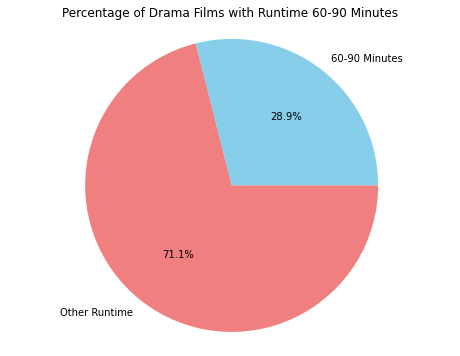

In [32]:
# Filtering the merged DataFrame to include only drama films

drama_df = merged_df[merged_df['genres'].str.contains('Drama')]


# Filtering the drama films to include only those with a runtime of 60 to 90 minutes

drama_runtime_df = drama_df[(drama_df['runtime_minutes'] >= 60) & (drama_df['runtime_minutes'] <= 90)]


# Calculating the count of drama films with a runtime of 60 to 90 minutes

num_drama_with_runtime = len(drama_runtime_df)


# Calculating the total number of drama films

total_drama_films = len(drama_df)


# Calculating the percentage of drama films with a runtime of 60 to 90 minutes

percentage_drama_with_runtime = (num_drama_with_runtime / total_drama_films) * 100


# Creating the pie chart
plt.figure(figsize=(8, 6))
plt.pie([percentage_drama_with_runtime, 100 - percentage_drama_with_runtime],
        labels=['60-90 Minutes', 'Other Runtime'],
        autopct='%1.1f%%',
        colors=['skyblue', 'lightcoral'])
plt.title('Percentage of Drama Films with Runtime 60-90 Minutes')
plt.axis('equal')
plt.show()


Only 28.9% of drama films have a runtime of 60 to 90 minutes.

*  From the analysis of runtime minutes, it would be advisable for Microsoft Movie Studio to produce a documentary film with a runtime of 60 to 90 minutes. Later on they can venture into the production of other genres with longer runtime minutes.

**Budget Analysis**
*  I want to understand the average budget for the well performing movies. This will help me predict the budget expected to produce a quality movie that does well in the market.
    
    
    I will categorize well performing movies in the documentary/drama categories due to the large sets of data. I will calculate the percentage of their profits. 

I will continue by performing a budget analysis on the merged DataFrame by calculating the average budget for well-performing movies based on the profit percentage, assuming that well-perfoming movies have a profit percentage >= 80%.

In [33]:
# Calculating profit for each movie

merged_df['profit'] = merged_df['worldwide_gross'] - merged_df['production_budget']


# Calculating profit percentage for each movie

merged_df['profit_percentage'] = (merged_df['profit'] / merged_df['production_budget']) * 100


# Filtering well-performing movies with profit percentage >= 80%

well_performing_movies = merged_df[merged_df['profit_percentage'] >= 80]


# Calculating the average budget for well-performing movies

average_budget_well_performing = well_performing_movies['production_budget'].mean()


print("Average Budget for Well-Performing Movies:", average_budget_well_performing)


Average Budget for Well-Performing Movies: 43196418.065593325


The average budget for all performing movies is 43,196,418.07$. This has taken into account all genres and all movies. Since I saw that documentaries and drama films with a runtime of 60 to 90 minutes are more popular, I will look filter the budget analysis based on these conditions and plot a bar graph that shows the average budget amounts for these categories.

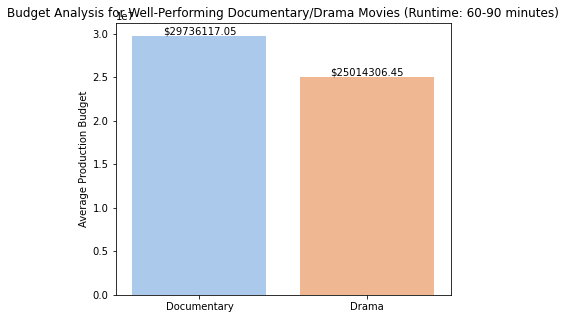

In [34]:
# Filtering the merged DataFrame to include only well-performing movies that are either a documentary or a drama and have a runtime of 60-90 minutes

filter_movies = well_performing_movies[(well_performing_movies['genres'].str.contains('Documentary')) | (well_performing_movies['genres'].str.contains('Drama'))]
filtered_movies = filter_movies[(filter_movies['runtime_minutes'] >= 60) & (filter_movies['runtime_minutes'] <= 90)]


# Calculating the average budget for the filtered well-performing documentary and drama movies

average_budget_documentary = filtered_movies[filtered_movies['genres'].str.contains('Documentary')]['production_budget'].mean()
average_budget_drama = filtered_movies[filtered_movies['genres'].str.contains('Drama')]['production_budget'].mean()


# Plotting the grouped bar chart

plt.figure(figsize=(6, 5))
bar_plot = sns.barplot(x=['Documentary', 'Drama'], y=[average_budget_documentary, average_budget_drama], palette='pastel')


# Displaying the specific amount at the top of each bar

for index, value in enumerate([average_budget_documentary, average_budget_drama]):
    bar_plot.text(index, value, f"${value:.2f}", ha='center', va='bottom')

plt.ylabel('Average Production Budget')
plt.title('Budget Analysis for Well-Performing Documentary/Drama Movies (Runtime: 60-90 minutes)')
plt.show()


With a more focused data, I can observe that Drama films have a production budget less than documentaries. 
*  Based on the budget analysis it would be advisable for Microsoft Movie Studios to invest in drama films. I however cannot conclusively say that drama films are better without having done a revenue analysis.

**Revenue Analysis**
*  I want to observe the expected revenues from the films and what what percentage on the production budget is expected. 
*  I will filter this based on documentary and drama films with a runtime of 60 to 90 minutes.

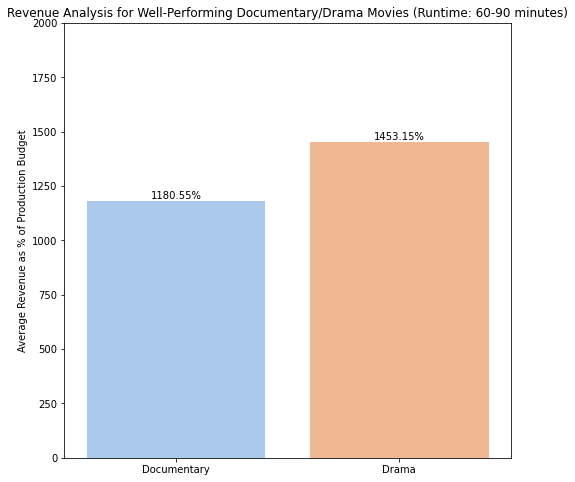

In [43]:
# Filtering the DataFrame to include only Documentary and Drama films with a runtime of 60 to 90 minutes

filtered_documentary_drama_movies = filtered_movies[(filtered_movies['genres'].str.contains('Documentary|Drama')) & 
                                                   (filtered_movies['runtime_minutes'] >= 60) & 
                                                   (filtered_movies['runtime_minutes'] <= 90)]


# Calculating the expected revenue for each movie

filtered_documentary_drama_movies['expected_revenue'] = filtered_documentary_drama_movies['domestic_gross'] + filtered_documentary_drama_movies['worldwide_gross']


# Calculating the revenue as a percentage of the production budget

filtered_documentary_drama_movies['revenue_percentage'] = (filtered_documentary_drama_movies['expected_revenue'] / filtered_documentary_drama_movies['production_budget']) * 100


# Calculating the average revenue percentage for each genre

average_revenue_percentage_by_genre = filtered_documentary_drama_movies.groupby('genres')['revenue_percentage'].mean()


# Creating the grouped bar plot

plt.figure(figsize=(8, 8))
bar_plot = sns.barplot(x=['Documentary', 'Drama'], y=[average_revenue_percentage_by_genre['Documentary'], average_revenue_percentage_by_genre['Drama']], palette='pastel')


# Displaying the specific amount at the top of each bar

for index, value in enumerate([average_revenue_percentage_by_genre['Documentary'], average_revenue_percentage_by_genre['Drama']]):
    bar_plot.text(index, value, f"{value:.2f}%", ha='center', va='bottom')

plt.ylabel('Average Revenue as % of Production Budget')
plt.title('Revenue Analysis for Well-Performing Documentary/Drama Movies (Runtime: 60-90 minutes)')
plt.ylim(0, 2000)  # Setting the y-axis limit to accommodate the percentage values
plt.show()


It can be observed that both genres offer a revenue return that is above 1000% on the production cost. Drama films are however more profitable as they offer a revenue return of about 1453% while documentaries offer 1180%.

**Rating Analysis**

* I want to check the avaerage ratings for the genres to be able to recommend to Microsoft a highly rated genre for production.

In [36]:
# Merging the 'title_basics_df' to the 'title_rating_df'

merged_title = pd.merge(title_basics_df, title_ratings_df, on='tconst', how='inner')

merged_title

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,87.0,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
...,...,...,...,...,...,...,...,...
73851,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary,6.2,6
73852,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,"Drama,Family",8.7,136
73853,tt9914642,Albatross,Albatross,2017,87.0,Documentary,8.5,8
73854,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,87.0,Unknown,6.6,5


I can start by checking the distribution of movie ratings using a histogram to see how the ratings are spread across different values

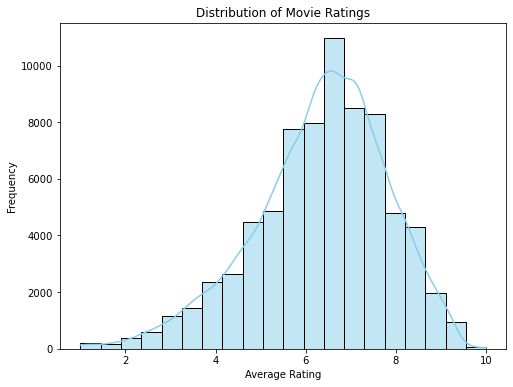

In [37]:
# Plotting the distribution of movie ratings

plt.figure(figsize=(8, 6))
sns.histplot(merged_title['averagerating'], bins=20, kde=True, color='skyblue')
plt.xlabel('Average Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Movie Ratings')
plt.show()


* Majority of the movies rated above average.

Next I will look to identify the top-rated genres by calculating the average rating for each genre.

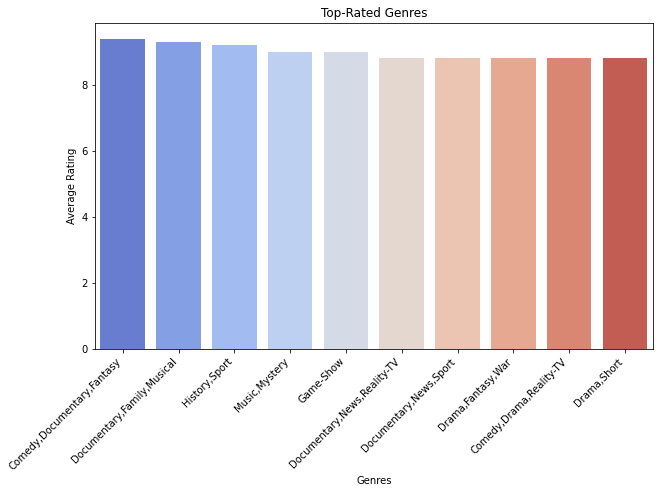

In [38]:
# Calculating the average rating for each genre

average_rating_by_genre = merged_title.groupby('genres')['averagerating'].mean().sort_values(ascending=False)


# Plotting the top-rated genres

plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x=average_rating_by_genre.index[:10], y=average_rating_by_genre.values[:10], palette='coolwarm')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Genres')
plt.ylabel('Average Rating')
plt.title('Top-Rated Genres')
plt.show()


* Films with a documentary aspect are highly rated.

Next, I will want to compare the ratings based on the runtimes to see if tuntime minutes affect the ratings of a movie.

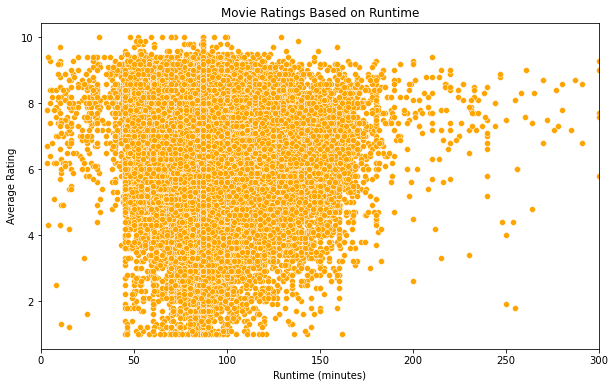

In [39]:
# Plotting ratings based on runtime

plt.figure(figsize=(10, 6))
scatter_plot = sns.scatterplot(x='runtime_minutes', y='averagerating', data=merged_title, color='orange')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Average Rating')
plt.title('Movie Ratings Based on Runtime')


# Setting the x-axis limits to 300 minutes

plt.xlim(0, 300)

plt.show()


* I can observe that films with a runtime of less than 50 minutes are not rated as much and that the longer the runtime is past 150 minutes the lower the number of ratings become.

Next,I will want to observe if the number of votes a movie gets affects the ratings of the film.

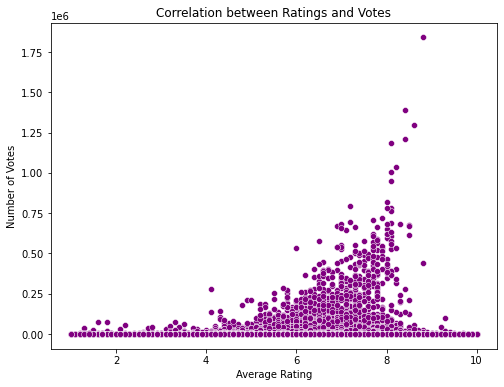

In [40]:
# Plotting the correlation between ratings and votes

plt.figure(figsize=(8, 6))
sns.scatterplot(x='averagerating', y='numvotes', data=merged_title, color='purple')
plt.xlabel('Average Rating')
plt.ylabel('Number of Votes')
plt.title('Correlation between Ratings and Votes')
plt.show()


* It is noticeable that indeed with an increasing number of votes, movies' ratings increase. Most are rated above average.

Lastly, I will want to compare the average ratings between documentary and drama films.

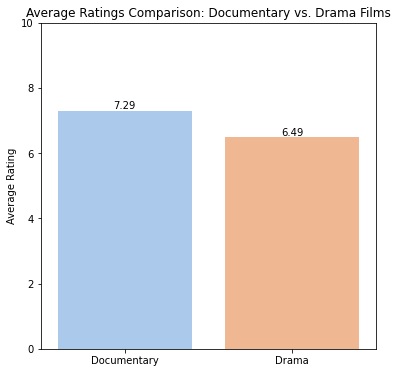

In [41]:
# Filtering the DataFrame to include only Documentary and Drama films

filtered_documentary_drama_movies = merged_title[merged_title['genres'].str.contains('Documentary|Drama')]


# Calculating the average rating for each genre

average_rating_by_genre = filtered_documentary_drama_movies.groupby('genres')['averagerating'].mean()


# Creating the bar plot

plt.figure(figsize=(6, 6))
bar_plot = sns.barplot(x=['Documentary', 'Drama'], y=[average_rating_by_genre['Documentary'], average_rating_by_genre['Drama']], palette='pastel')


# Displaying the specific average rating at the top of each bar
for index, value in enumerate([average_rating_by_genre['Documentary'], average_rating_by_genre['Drama']]):
    bar_plot.text(index, value, f"{value:.2f}", ha='center', va='bottom')

plt.ylabel('Average Rating')
plt.title('Average Ratings Comparison: Documentary vs. Drama Films')
plt.ylim(0, 10)  # Setting the y-axis limit to accommodate the rating values (0 to 10 scale)
plt.show()


* It can be observed that Documentary films are highly rated compared to drama films with a rating of 7.29 compared to 6.49, respectively.

Based on the ratings, it would be advisable for Microsoft to invest in the production of Documentary films which are highly rated by the public. 

**CONCLUSION**

In this project, I aimed to provide sound and profitable recommendations to Microsoft Movie Studio as it enters the movie industry. The analysis focused on several key aspects to guide decision-making:

Genre Analysis:

* Documentary and Drama emerged as the most popular genres, accounting for approximately 50% of all movies. Documentary films are particularly prevalent, followed closely by Drama.
* Considering the popularity of Documentary films, it is recommended that Microsoft Movie Studio considers investing in this genre, especially given its potential for high ratings.

Runtime Analysis:

* Viewers generally prefer movies with a runtime of 60 to 90 minutes. This runtime category dominates the dataset, suggesting that shorter films are more popular.
* Microsoft Movie Studio should prioritize producing movies with a runtime of 60 to 90 minutes, as they are likely to attract a larger audience.

Budget Analysis:

* Drama films have a lower average production budget compared to documentaries. This indicates that Drama films can be more cost-effective while still achieving profitability.
* Microsoft Movie Studio could consider starting with Drama films, as they offer a balance between popularity and cost-effectiveness.

Revenue Analysis:

* Both Documentary and Drama films have high average revenue percentages relative to their production budgets, indicating strong profitability potential.
* Drama films, in particular, demonstrate an impressive average revenue percentage of around 1453%, making them a promising investment choice.

Rating Analysis:

* Documentary films receive higher average ratings compared to Drama films. With an average rating of 7.29, Documentary films are highly regarded by viewers.
* Microsoft Movie Studio can capitalize on the popularity and positive reception of Documentary films by producing content that aligns with this genre.


Overall, the analysis suggests that Microsoft Movie Studio should prioritize the production of Documentary films with a runtime of 60 to 90 minutes. This genre has shown high popularity, profitability, and positive ratings, making it a promising venture for the studio. As the studio gains momentum, it can also explore producing Drama films, which offer a cost-effective approach with potential for high profitability.

However, it is essential for Microsoft Movie Studio to continuously monitor industry trends, audience preferences, and evolving market dynamics to adapt its strategies and remain successful in the highly competitive movie industry.